In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ,QuantumCircuit,Aer,execute
from qiskit.circuit.library.standard_gates import *
%matplotlib inline

In [4]:
def show_distribution(state,nqubits):
    plt.bar([i for i in range(pow(2,nqubits))], abs(state))
    plt.show()

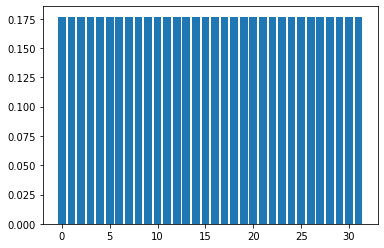

In [5]:
nqubits = 5

def make_Hadamard(circuit,nqubits):
    for i in range(nqubits):
        circuit.h(i)
    return circuit


circuit=QuantumCircuit(nqubits)
circuit=make_Hadamard(circuit,nqubits)
backend=Aer.get_backend("statevector_simulator")
state=execute(circuit,backend).result().get_statevector()

show_distribution(state,nqubits)

In [6]:
def make_U_w(circuit, nqubits):
    circuit.append( ZGate().control(nqubits-1),[i for i in range(nqubits)])
    return circuit

In [7]:
circuit=QuantumCircuit(nqubits)
circuit=make_Hadamard(circuit,nqubits)
circuit=make_U_w(circuit,nqubits)

backend=Aer.get_backend("statevector_simulator")
state=execute(circuit,backend).result().get_statevector()
print(state)

[ 0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j  0.1767767+0.00000000e+00j
  0.1767767+0.00000000e+00j -0.1767767+2.16489014e-17j]


In [8]:
def make_U_s(circuit, nqubits):
    for i in range(nqubits):
        circuit.h(i)

    circuit.rz(-2*np.pi, nqubits-1)
    circuit.x(nqubits-1)
    ctrl_s="0"
    for i in range(nqubits-2):
        ctrl_s+="0"
    circuit.append(ZGate().control(nqubits-1,None,ctrl_s),[i for i in range(nqubits)])
    circuit.x(nqubits-1)

    for i in range(nqubits):
        circuit.h(i)
    return circuit

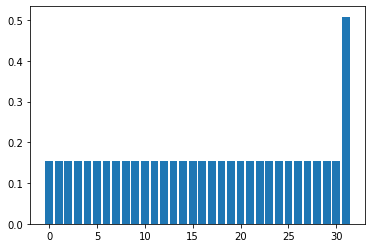

In [9]:
circuit=QuantumCircuit(nqubits)
circuit=make_Hadamard(circuit,nqubits)
circuit=make_U_w(circuit,nqubits)
circuit=make_U_s(circuit,nqubits)
state=execute(circuit,backend).result().get_statevector()
show_distribution(state,nqubits)

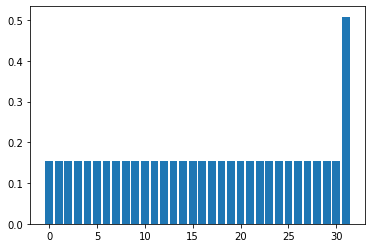

0.5082329989778311


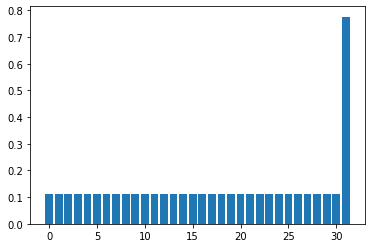

0.776160177786797


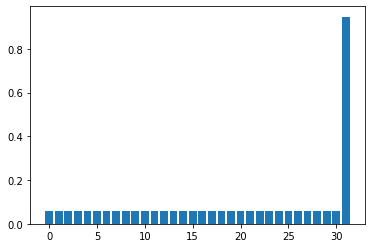

0.9470673343724136


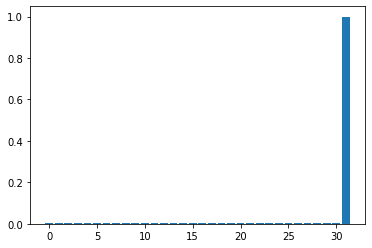

0.9995910741614789


In [10]:
circuit=QuantumCircuit(nqubits)
for i in range(nqubits):
    circuit.x(i)

target_state=execute(circuit,backend).result().get_statevector()

circuit=QuantumCircuit(nqubits)
circuit=make_Hadamard(circuit,nqubits)

for i in range(4):
    circuit=make_U_w(circuit,nqubits)
    circuit=make_U_s(circuit,nqubits)
    state=execute(circuit,backend).result().get_statevector()
    show_distribution(state,nqubits)
    print(np.linalg.norm(np.dot(state, target_state)))

maximal probability 9.997306e-01 is obtained at k = 25


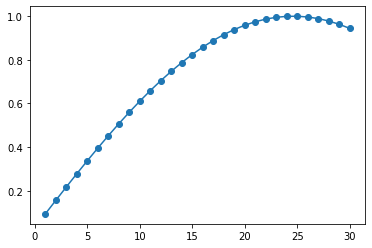

In [11]:
nqubits = 10

circuit=QuantumCircuit(nqubits)

for i in range(nqubits):
    circuit.x(i)
    
target_state=execute(circuit,backend).result().get_statevector()

circuit=QuantumCircuit(nqubits)
circuit=make_Hadamard(circuit,nqubits)

result = []

for k in range(30):
    circuit=make_U_w(circuit,nqubits)
    circuit=make_U_s(circuit,nqubits)
    state=execute(circuit,backend).result().get_statevector()
    result.append(np.linalg.norm(np.dot(state, target_state)))

max_k = np.argmax(result)
print( f"maximal probability {result[max_k]:5e} is obtained at k = {max_k+1}")

plt.plot(np.arange(1, 30+1), result, "o-")

In [12]:
result = []
min_nqubits = 6
max_nqubits = 16

for nqubits in range(min_nqubits, max_nqubits+1, 2):

    circuit=QuantumCircuit(nqubits)
    for i in range(nqubits):
        circuit.x(i)
    target_state=execute(circuit,backend).result().get_statevector()
    
    circuit=QuantumCircuit(nqubits)
    circuit=make_Hadamard(circuit,nqubits)
    
    tmp = 0
    flag = 0
    num_iter = 0
    while flag == 0 and num_iter <= 1000:
        num_iter += 1
        circuit=make_U_w(circuit,nqubits)
        circuit=make_U_s(circuit,nqubits)
        state=execute(circuit,backend).result().get_statevector()
        suc_prob = np.linalg.norm(np.dot(state, target_state))
        if tmp < suc_prob:
            tmp = suc_prob
        else:
            flag = 1
    result.append( [nqubits, num_iter, suc_prob] )
    print(f"nqubits={nqubits}, num_iter={num_iter}, suc_prob={suc_prob:5e}")

nqubits=6, num_iter=7, suc_prob=9.526013e-01
nqubits=8, num_iter=13, suc_prob=9.930691e-01
nqubits=10, num_iter=26, suc_prob=9.963280e-01
nqubits=12, num_iter=51, suc_prob=9.992534e-01
nqubits=14, num_iter=101, suc_prob=9.998851e-01
nqubits=16, num_iter=202, suc_prob=9.999368e-01


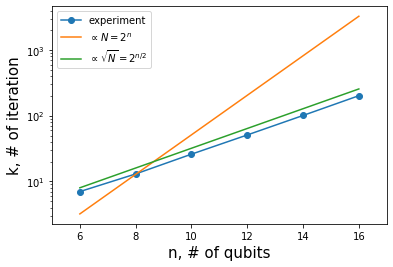

In [13]:
result_array = np.array(result)

plt.xlim(min_nqubits-1, max_nqubits+1)
plt.xlabel("n, # of qubits", fontsize=15)
plt.ylabel("k, # of iteration", fontsize=15)
plt.semilogy(result_array[:,0], result_array[:,1], "o-", label="experiment")
plt.semilogy(result_array[:,0], 0.05*2**result_array[:,0], "-", label=r"$\propto N=2^n$")
plt.semilogy(result_array[:,0], 2**(0.5*result_array[:,0]), "-", label=r"$\propto \sqrt{N}=2^{n/2}$")
plt.legend(fontsize=10)